# 2018-02-16 / FMA sub-sampling mk2

* In case entrofy is too slow / doesn't work out, we'll make a backup sampler
* Requirements:
    * subsample of size N
    * for each instrument, at least K positives
    

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [85]:
import seaborn as sns

In [3]:
%matplotlib nbagg

In [24]:
df = pd.read_csv('/home/bmcfee/data/vggish-likelihoods-a226b3-maxagg10.csv.gz', index_col=0)

In [25]:
df.head(5)

,accordion,bagpipes,banjo,bass,cello,clarinet,cymbals,drums,flute,guitar,...,mandolin,organ,piano,saxophone,synthesizer,trombone,trumpet,ukulele,violin,voice
000002_0000,0.01542,0.008608,0.010215,0.035007,0.008873,0.00893,0.086853,0.671350,0.021807,0.135010,...,0.006079,0.011073,0.084341,0.015115,0.781432,0.012166,0.025021,0.044818,0.067646,0.999691
000002_0001,0.01542,0.008608,0.010215,0.076214,0.008873,0.00893,0.086853,0.630533,0.021807,0.244505,...,0.006079,0.011073,0.084341,0.015115,0.781432,0.012166,0.025021,0.044818,0.067646,0.999691
000002_0002,0.01542,0.008608,0.010215,0.076214,0.008873,0.00893,0.089177,0.858667,0.021807,0.244505,...,0.006079,0.011073,0.084341,0.015115,0.188291,0.012166,0.025021,0.044818,0.067646,0.999691
000002_0003,0.01542,0.008608,0.010215,0.076214,0.004974,0.00893,0.089177,0.858667,0.012667,0.244505,...,0.003388,0.009051,0.040380,0.009120,0.131694,0.005950,0.014247,0.044818,0.067646,0.999691
000002_0004,0.01542,0.008608,0.009334,0.076214,0.004974,0.00893,0.089177,0.858667,0.012667,0.244505,...,0.003388,0.017866,0.078745,0.009120,0.204007,0.005950,0.014247,0.028634,0.088025,0.999691


In [26]:
K = 500
N = K * 23

# Algorithm
- For each instrument, take the top-K track-distinct entries.
- Skip tracks that have already appeared
- Take instruments in ascending order of median likelihood

In [42]:
dfm = df.median(axis=0)

In [47]:
dfm.sort_values().index

Index(['banjo', 'mandolin', 'harp', 'clarinet', 'bagpipes', 'accordion',
       'harmonica', 'ukulele', 'trombone', 'trumpet', 'cello', 'saxophone',
       'flute', 'organ', 'mallet_percussion', 'cymbals', 'violin', 'piano',
       'bass', 'synthesizer', 'guitar', 'drums', 'voice'],
      dtype='object')

In [48]:
idx_set = set()

track_set = set()

for col in tqdm(dfm.sort_values().index):
        
    idx_inst = df[col].sort_values(ascending=False).index
    count = 0
    
    for v in idx_inst:
        track, seg = v.split('_', maxsplit=1)
        
        if track in track_set:
            continue
            
        idx_set.add(v)
        track_set.add(track)
        count += 1
        
        if count == K:
            break

HBox(children=(IntProgress(value=0, max=23), HTML(value='')))

In [49]:
df_sample = df.loc[idx_set]

In [50]:
df_sample.describe()

,accordion,bagpipes,banjo,bass,cello,clarinet,cymbals,drums,flute,guitar,...,mandolin,organ,piano,saxophone,synthesizer,trombone,trumpet,ukulele,violin,voice
count,11500.000000,1.150000e+04,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,0.085787,7.199531e-02,0.054406,0.173591,0.102443,0.058038,0.092790,0.377352,0.124724,0.517153,...,0.059258,0.109836,0.201940,0.120517,0.266107,0.093009,0.111922,0.094019,0.289565,0.483926
std,0.216186,2.189486e-01,0.183548,0.196825,0.206596,0.155045,0.187944,0.319502,0.241927,0.337568,...,0.159600,0.198223,0.211666,0.231770,0.264546,0.202217,0.212164,0.201834,0.320587,0.331609
min,0.000015,1.050304e-07,0.000003,0.000856,0.000153,0.000037,0.000002,0.000070,0.000023,0.001715,...,0.000004,0.000094,0.001086,0.000132,0.000020,0.000011,0.000041,0.000012,0.000242,0.002652
25%,0.004035,1.688136e-03,0.001414,0.049797,0.012927,0.004810,0.010485,0.095295,0.011623,0.202477,...,0.002033,0.018933,0.078108,0.012683,0.049319,0.006875,0.009251,0.004268,0.054098,0.189448
50%,0.012542,6.368988e-03,0.004610,0.105575,0.028529,0.013288,0.030221,0.282790,0.030994,0.454625,...,0.005547,0.042239,0.139646,0.027828,0.173179,0.016869,0.023927,0.012511,0.141109,0.401221
75%,0.044121,2.315261e-02,0.015032,0.206402,0.068752,0.036228,0.078883,0.601537,0.084218,0.889630,...,0.018741,0.098972,0.236478,0.084476,0.411509,0.054253,0.076791,0.049772,0.427234,0.823966
max,0.989912,9.993549e-01,0.981382,0.924326,0.951616,0.965801,0.955233,0.999531,0.994685,0.999874,...,0.913021,0.981344,0.970724,0.966764,0.971533,0.950456,0.943341,0.944238,0.999661,0.999998


In [55]:
Xs = df_sample.values

In [61]:
np.cov(Xs.T)

array([[  4.7e-02,   5.7e-03,  -1.1e-03,  -5.4e-03,  -2.5e-04,   1.3e-03,
         -4.0e-03,  -7.5e-03,  -1.4e-03,  -1.0e-02,   1.5e-02,  -3.2e-03,
         -4.0e-03,  -1.1e-03,   4.1e-03,  -2.4e-04,   3.1e-03,  -9.5e-04,
          1.7e-03,   2.2e-03,  -2.8e-03,   1.5e-02,   2.8e-03],
       [  5.7e-03,   4.8e-02,  -2.5e-03,  -5.0e-03,  -1.4e-03,   3.4e-04,
         -2.1e-03,  -1.6e-03,   4.1e-05,  -7.7e-03,   9.1e-03,  -3.3e-03,
         -2.9e-03,  -1.9e-03,   1.5e-03,  -2.8e-03,   2.5e-04,   8.9e-04,
         -1.6e-03,   6.8e-04,  -4.4e-03,   1.7e-02,  -9.9e-05],
       [ -1.1e-03,  -2.5e-03,   3.4e-02,  -2.6e-03,  -2.6e-03,  -2.0e-03,
         -2.7e-03,  -2.5e-03,  -3.5e-03,   1.1e-02,  -1.6e-03,  -1.6e-04,
         -1.4e-03,   8.8e-03,  -3.0e-03,  -2.7e-03,  -2.8e-03,  -6.1e-03,
         -1.9e-03,  -2.7e-03,   1.1e-02,  -9.1e-04,   6.9e-03],
       [ -5.4e-03,  -5.0e-03,  -2.6e-03,   3.9e-02,   1.6e-02,  -1.3e-04,
         -7.7e-05,   7.7e-03,  -6.6e-03,   3.4e-02,  -6.0e-03,  -1.1

In [62]:
import matplotlib.pyplot as plt
%matplotlib nbagg

In [103]:
#C = np.cov(Xs.T)

In [108]:
C = df_sample.corr()
Co = df.corr()

<IPython.core.display.Javascript object>


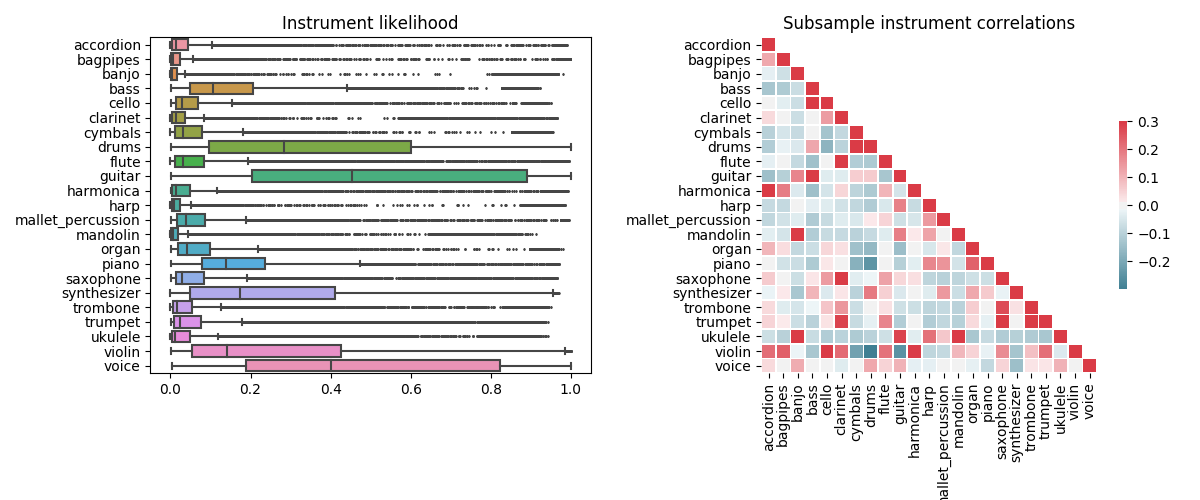

In [112]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
#sns.pointplot(data=df_sample, orient='h', join=False, markers='o', capsize=1, )
sns.boxplot(data=df_sample, orient='h', fliersize=1)

plt.title('Instrument likelihood')
plt.ylim([-0.5, 22.5])
plt.gca().invert_yaxis()

plt.subplot(1,2,2)

mask = np.zeros_like(C, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(C, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Subsample instrument correlations')
plt.tight_layout()

<IPython.core.display.Javascript object>


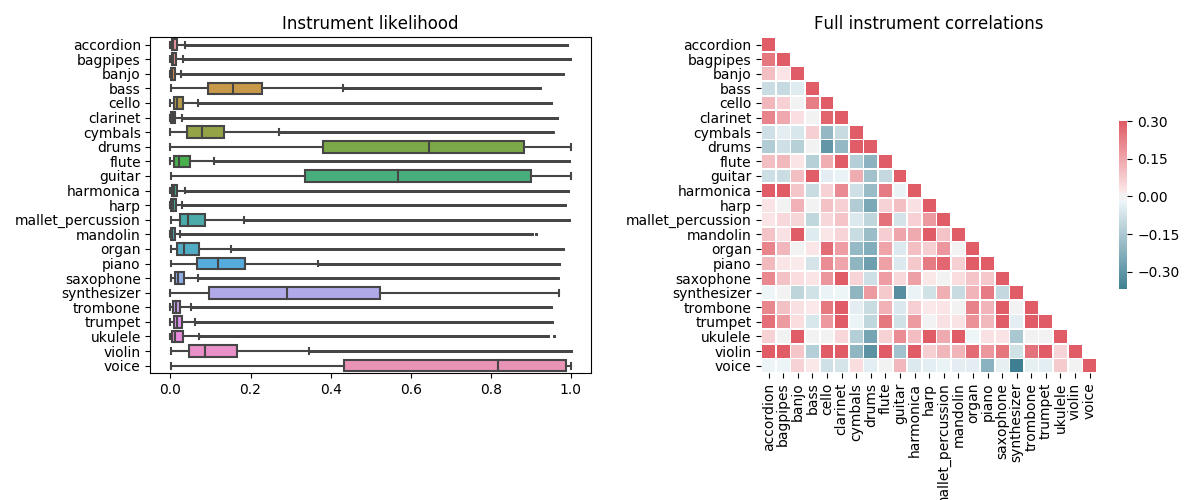

In [117]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
#sns.pointplot(data=df, orient='h', join=False, markers='o', capsize=1, )
sns.boxplot(data=df, orient='h', fliersize=1)

plt.title('Instrument likelihood')
plt.ylim([-0.5, 22.5])
plt.gca().invert_yaxis()

plt.subplot(1,2,2)

mask = np.zeros_like(Co, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(Co, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Full instrument correlations')
plt.tight_layout()

In [51]:
len(idx_set)

11500

In [53]:
import json

In [54]:
with open('../notebooks/subsample_idx_greedy.json', 'w') as fd:
    json.dump(list(idx_set), fd, indent=2)